# 
# **Question: HOW MUCH SHOULD A USED CAR COST?**
[Dataset from Kaggle](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)

```
E.Stone

In [1]:
import os
import warnings
import zipfile
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # To visualize

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


#os.getcwd()

# 
# **Creating the Dataset**

In [2]:
# List data files
os.listdir("/home/data")

['vauxhall.csv',
 'audi.csv',
 'ford.csv',
 'bmw.csv',
 'vw.csv',
 'merc.csv',
 'hyundi.csv',
 'cclass.csv',
 'toyota.csv',
 'focus.csv',
 'skoda.csv']

In [3]:
##Combining all csv files into one dataset - Note there are two files that will be removed at a later time. File names begin with uncelan
data = []
for filename in os.listdir("data"):
    df = pd.read_csv(f"/home/data/{filename}")
    df["make"] = filename.split(".csv")[0]
    data.append(df)

df = pd.concat(data)
df.reset_index(inplace=True, drop = True)


# 
# **Exploring the Data**

In [4]:
# List data files to validate the uncelan have been dropped
os.listdir("/home/data")

['vauxhall.csv',
 'audi.csv',
 'ford.csv',
 'bmw.csv',
 'vw.csv',
 'merc.csv',
 'hyundi.csv',
 'cclass.csv',
 'toyota.csv',
 'focus.csv',
 'skoda.csv']

In [5]:
display(df)#displays all rows and columns

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,tax(£)
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall,NaN
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall,NaN
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall,NaN
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall,NaN
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Yeti,2014,11440,Semi-Auto,14569,Petrol,160.0,44.8,1.2,skoda,NaN
108536,Octavia,2014,10990,Semi-Auto,49999,Petrol,30.0,56.5,1.4,skoda,NaN
108537,Fabia,2017,9500,Semi-Auto,17131,Petrol,145.0,61.4,1.0,skoda,NaN
108538,Citigo,2016,5999,Manual,21747,Petrol,20.0,62.8,1.0,skoda,NaN


In [6]:
##Shows the newly created dataset
df.head(12) #shows 12 rows

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,tax(£)
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall,NaN
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall,NaN
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall,NaN
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall,NaN
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall,NaN
5,Corsa,2017,9743,Manual,13546,Petrol,145.0,49.6,1.4,vauxhall,NaN
6,Corsa,2011,3995,Manual,53067,Petrol,145.0,49.6,1.4,vauxhall,NaN
7,Corsa,2019,9990,Manual,3953,Petrol,150.0,43.5,1.4,vauxhall,NaN
8,Corsa,2018,10000,Manual,11160,Petrol,145.0,43.5,1.4,vauxhall,NaN
9,Corsa,2016,6999,Manual,13046,Petrol,30.0,55.4,1.4,vauxhall,NaN


# 
# **Dropping 2 CSV Files**

In [7]:
##removing 2 unwanted files
import os 
os.remove(r'/home/data/unclean focus.csv' )
os.remove (r'/home/data/unclean cclass.csv'  )
##removing the unclean focus dataset -- CAN YOU DO THIS IN ONE STEP?

FileNotFoundError: [Errno 2] No such file or directory: '/home/data/unclean focus.csv'

# 
# **Continuing to Explore the Data**

In [48]:
df.columns #shows the columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'make', 'tax(£)'],
      dtype='object')

In [49]:
df.dtypes#shows datatypes within file 

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
make             object
tax(£)          float64
dtype: object

In [50]:
df.info() ##helpful info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   make          108540 non-null  object 
 10  tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.1+ MB


In [51]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,tax(£)
count,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,4860.000000
mean,2017.098028,16890.124046,23025.928469,120.256183,55.166825,1.661644,121.147119
std,2.130057,9756.266820,21176.423684,63.404805,16.138522,0.557058,58.003289
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000


In [28]:
df.sort_values (
    by=["brand","model", "year"]
)[["brand","model", "year"]]

,brand,model,year
76326,audi,A1,2010
75319,audi,A1,2011
75485,audi,A1,2011
75486,audi,A1,2011
75918,audi,A1,2011
...,...,...,...
19202,vw,Up,2020
19206,vw,Up,2020
19214,vw,Up,2020
19221,vw,Up,2020


In [17]:
df.groupby(['model','year']).agg({'count'})




price transmission mileage fuelType   tax   mpg engineSize  \
               count        count   count    count count count      count   
model     year                                                              
 1 Series 2001     1            1       1        1     1     1          1   
          2004     1            1       1        1     1     1          1   
          2005     1            1       1        1     1     1          1   
          2006     2            2       2        2     2     2          2   
          2007     1            1       1        1     1     1          1   
...              ...          ...     ...      ...   ...   ...        ...   
 i8       2019     6            6       6        6     6     6          6   
180       2014     1            1       1        1     1     1          1   
200       2018     1            1       1        1     1     1          1   
220       2018     1            1       1        1     1     1          1   
230       2007     1            1       1        1     1     1          1   

               brand tax(£)  
               count  count  
model     year               
 1 Series 2001     1      0  
          2004     1      0  
          2005     1      0  
          2006     2      0  
          2007     1      0  
...              ...    ...  
 i8       2019     6      0  
180       2014     1      0  
200       2018     1      0  
220       2018     1      0  
230       2007     1      0  

[1615 rows x 9 columns]

In [16]:
# Null values

df.isna().sum()

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax              14213
mpg               9353
engineSize           0
brand                0
tax(£)          103680
dtype: int64

In [54]:
df.groupby('model').count()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,tax(£)
model,,,,,,,,,,
1 Series,1969,1969,1969,1969,1969,1969,1969,1969,1969,0
2 Series,1229,1229,1229,1229,1229,1229,1229,1229,1229,0
3 Series,2443,2443,2443,2443,2443,2443,2443,2443,2443,0
4 Series,995,995,995,995,995,995,995,995,995,0
5 Series,1056,1056,1056,1056,1056,1056,1056,1056,1056,0
...,...,...,...,...,...,...,...,...,...,...
i8,17,17,17,17,17,17,17,17,17,0
180,1,1,1,1,1,1,1,1,1,0
200,1,1,1,1,1,1,1,1,1,0


In [56]:
df.groupby('model')['price','mileage'].mean()

,price,mileage
model,,
1 Series,15821.670391,27916.201117
2 Series,19539.371847,17042.604557
3 Series,19880.857962,31858.368400
4 Series,22498.418090,21786.536683
5 Series,22537.428030,30761.406250
...,...,...
i8,57012.588235,17193.176471
180,10799.000000,39240.000000
200,19495.000000,15113.000000


In [43]:
#Number of rows with mileage under 500
df.loc[(df['mileage'] <=500)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,tax(£)
28,GT86,2020,24990,Manual,339,Petrol,145.0,33.2,2.0,toyota,NaN
33,GT86,2019,25999,Manual,100,Petrol,145.0,33.2,2.0,toyota,NaN
37,GT86,2019,27000,Semi-Auto,100,Petrol,145.0,32.8,2.0,toyota,NaN
63,GT86,2019,27950,Manual,489,Petrol,145.0,33.2,2.0,toyota,NaN
165,Corolla,2019,16990,Manual,25,Petrol,145.0,39.2,1.2,toyota,NaN
...,...,...,...,...,...,...,...,...,...,...,...
107345,X-CLASS,2019,28675,Automatic,39,Diesel,260.0,35.8,2.3,merc,NaN
107346,X-CLASS,2019,28900,Automatic,37,Diesel,260.0,35.8,2.3,merc,NaN
108315,C Class,2020,40999,Automatic,400,Other,135.0,217.3,2.0,merc,NaN
108458,C Class,2019,30294,Automatic,500,Diesel,145.0,61.4,2.0,merc,NaN


#
# **Visualization**

<AxesSubplot:xlabel='mpg', ylabel='count'>

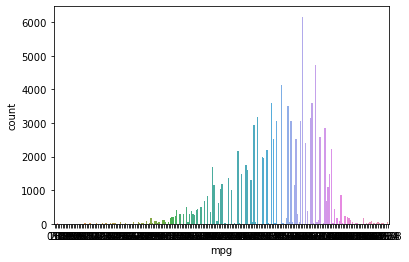

In [118]:
##df.mpg.hist()
sns.countplot(df["mpg"])

<AxesSubplot:xlabel='transmission', ylabel='count'>

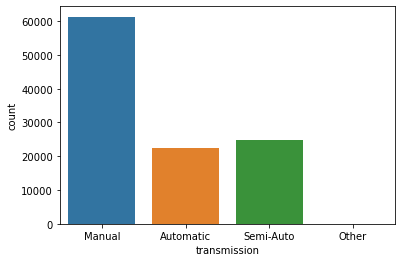

In [22]:
sns.countplot(df["transmission"])

<Figure size 1080x360 with 0 Axes>

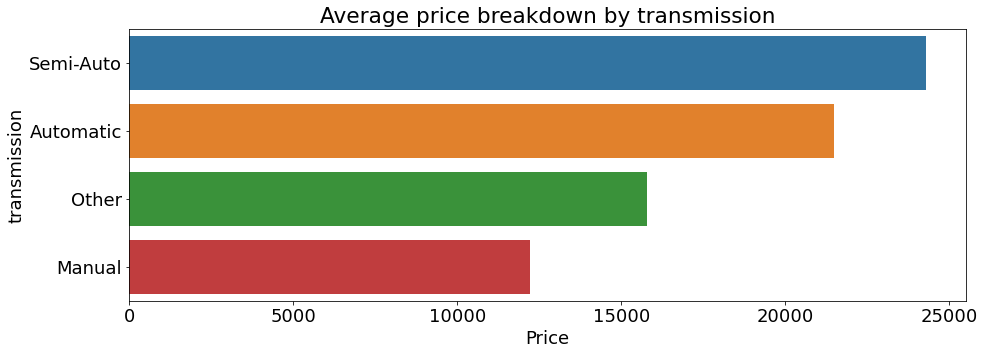

<Figure size 1080x360 with 0 Axes>

In [10]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
column = 'transmission'
graph =  df.groupby(column)['price'].mean().sort_values(ascending=False).head(10)
fig = sns.barplot(x = graph.values, y = graph.index);
fig.set(xlabel = 'Price', ylabel = 'transmission', title = 'Average price breakdown by transmission');
plt.figure()

<AxesSubplot:xlabel='year', ylabel='count'>

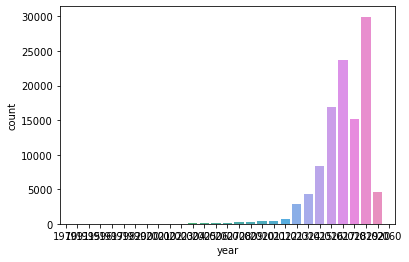

In [23]:
sns.countplot(df["year"])

<AxesSubplot:>

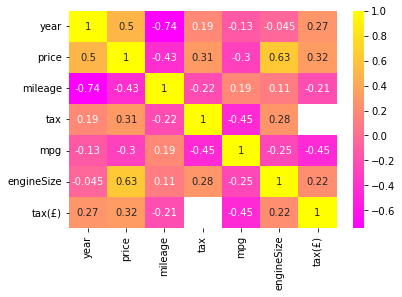

In [24]:
corr = df.corr()
sns.heatmap(corr, cmap="spring", annot=True)

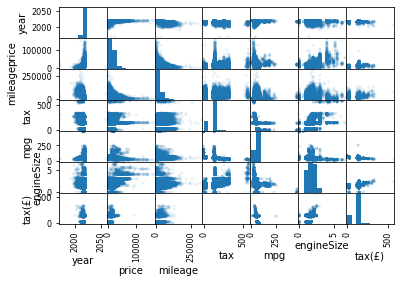

<Figure size 1440x1440 with 0 Axes>

In [25]:
pd.plotting.scatter_matrix(df, alpha=0.1)
plt.figure(figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='year', ylabel='price'>

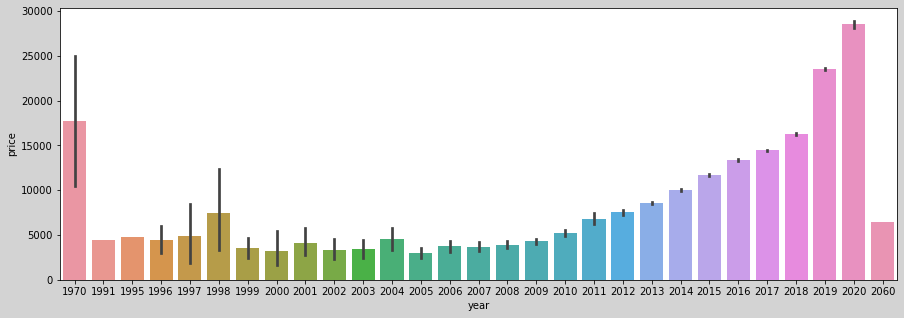

In [26]:
plt.figure(figsize = (15, 5), facecolor="lightgray")
sns.barplot(x = df["year"], y = df["price"])

In [27]:
plt.figure(figsize = (30, 5), facecolor="lightgray")
sns.barplot(x = df["price"], y = df["mpg"])

<AxesSubplot:xlabel='engineSize', ylabel='price'>

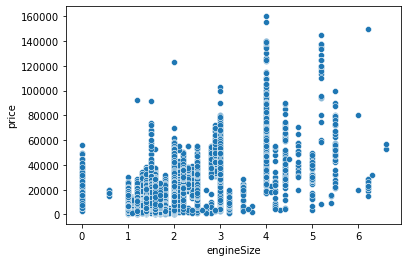

In [73]:
sns.scatterplot(x="engineSize", y="price", data=df);

<AxesSubplot:xlabel='make', ylabel='price'>

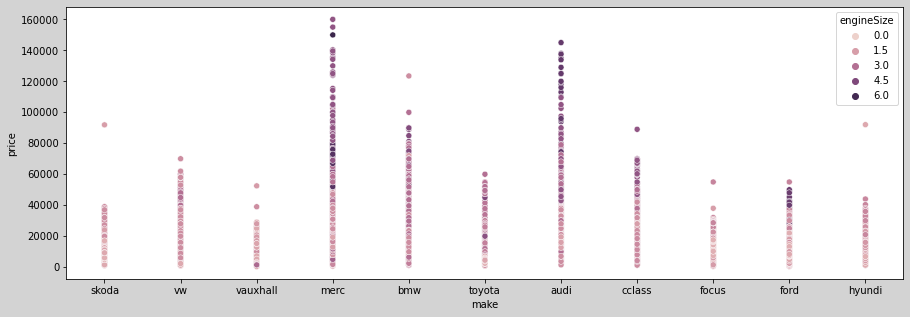

In [86]:
plt.figure(figsize = (15, 5), facecolor = "lightgray")
sns.scatterplot(df["make"], df["price"], hue = df["engineSize"])

<AxesSubplot:xlabel='fuelType', ylabel='count'>

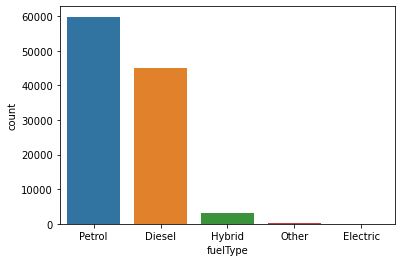

In [79]:
sns.countplot(df["fuelType"])

<Figure size 1080x360 with 0 Axes>

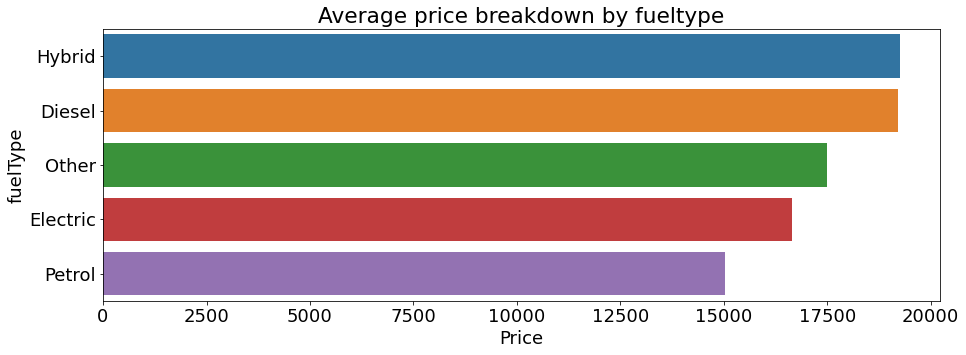

<Figure size 1080x360 with 0 Axes>

In [20]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
column = 'fuelType'
graph =  df.groupby(column)['price'].mean().sort_values(ascending=False).head(10)
fig = sns.barplot(x = graph.values, y = graph.index);
fig.set(xlabel = 'Price', ylabel = 'fuelType', title = 'Average price breakdown by fueltype');
plt.figure()

<AxesSubplot:xlabel='mileage', ylabel='price'>

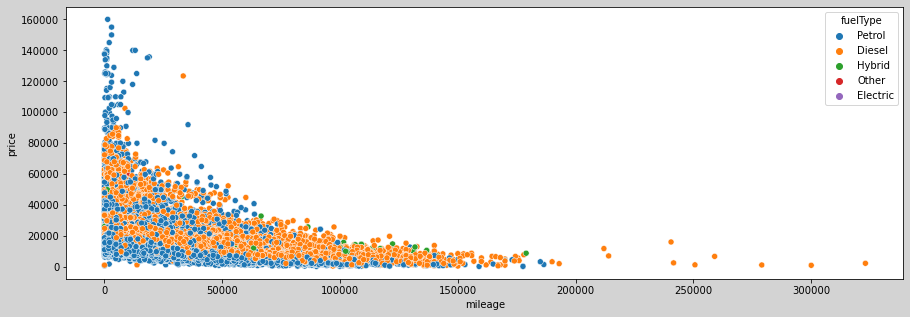

In [13]:
plt.figure(figsize = (15, 5), facecolor = "lightgray")
sns.scatterplot(df["mileage"], df["price"], hue = df["fuelType"])

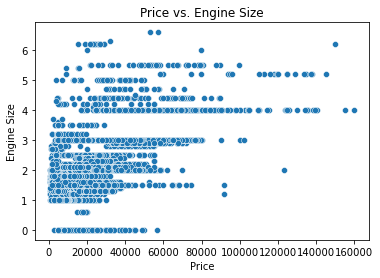

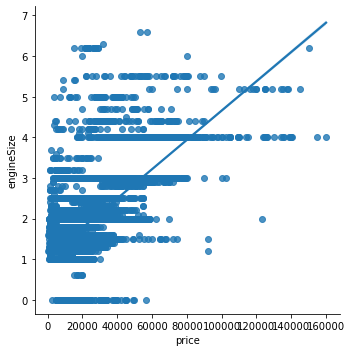

KeyError: "['AirEntrain'] not in index"

In [16]:
ax = sns.scatterplot(x="price", y="engineSize", data=df)
ax.set_title("Price vs. Engine Size")
ax.set_xlabel("Price")
ax.set_ylabel("Engine Size")
sns.lmplot(x="price", y="engineSize", data=df)
sns.lmplot(x="price", y="engineSize", hue="AirEntrain", data=df);

<AxesSubplot:xlabel='make', ylabel='price'>

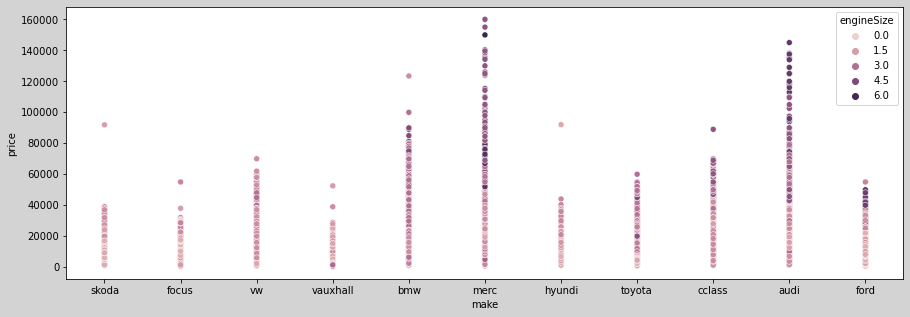

In [15]:
plt.figure(figsize = (15, 5), facecolor = "lightgray")
sns.scatterplot(df["make"], df["price"], hue = df["engineSize"])

<AxesSubplot:xlabel='make', ylabel='count'>

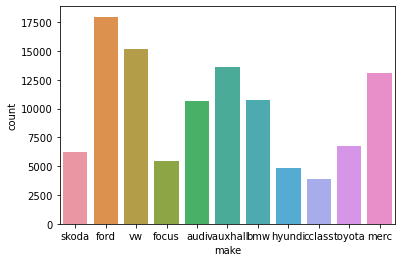

In [17]:
sns.countplot(df["make"])
#sns.countplot(order=['count'], data=df, palette='viridis')



<AxesSubplot:xlabel='mileage', ylabel='price'>

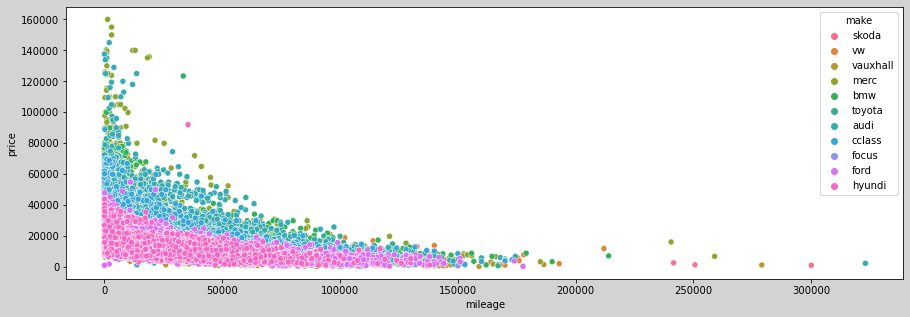

In [115]:
plt.figure(figsize = (15, 5), facecolor = "lightgray")
sns.scatterplot(df["mileage"], df["price"], hue = df["make"])

count     108540
unique       195
top        Focus
freq       10042
Name: model, dtype: object


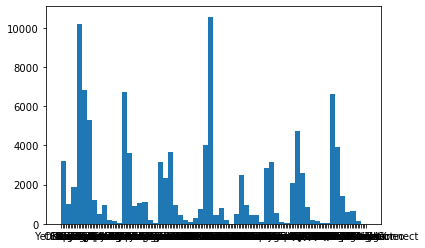

In [17]:
plt.hist(df.model, bins=60)
print(df.model.describe())

count    108540.000000
mean      23025.928469
std       21176.423684
min           1.000000
25%        7491.750000
50%       17265.000000
75%       32236.000000
max      323000.000000
Name: mileage, dtype: float64


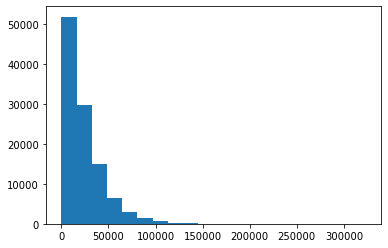

In [59]:
plt.hist(df.mileage, bins=20)
print(df.mileage.describe())

count     10668.000000
mean      24827.244001
std       23505.257205
min           1.000000
25%        5968.750000
50%       19000.000000
75%       36464.500000
max      323000.000000
Name: mileage, dtype: float64


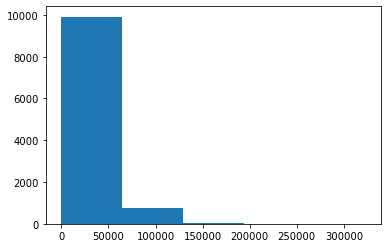

In [20]:
plt.hist(df.mileage, bins=5)
print(df.mileage.describe())

count    108540.000000
mean      16890.124046
std        9756.266820
min         450.000000
25%       10229.500000
50%       14698.000000
75%       20940.000000
max      159999.000000
Name: price, dtype: float64


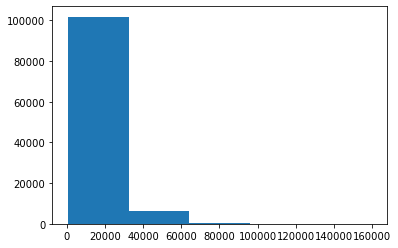

In [18]:
plt.hist(df.price, bins=5)
print(df.price.describe())

<Figure size 1080x360 with 0 Axes>

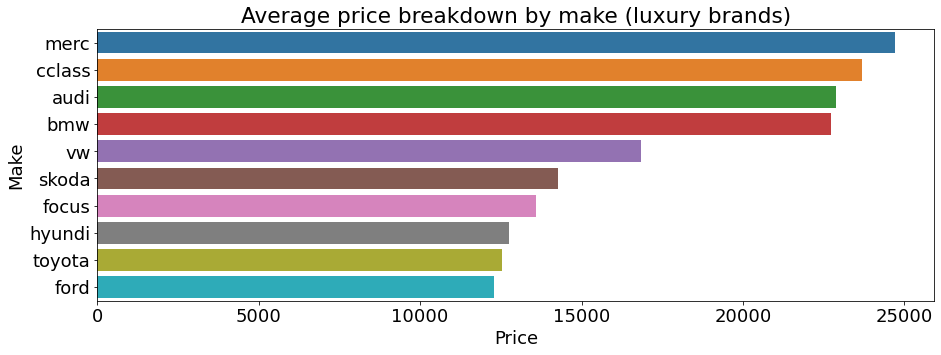

<Figure size 1080x360 with 0 Axes>

In [36]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
column = 'make'
graph =  df.groupby(column)['price'].mean().sort_values(ascending=False).head(10)
fig = sns.barplot(x = graph.values, y = graph.index);
fig.set(xlabel = 'Price', ylabel = 'Make', title = 'Average price breakdown by make');
plt.figure()

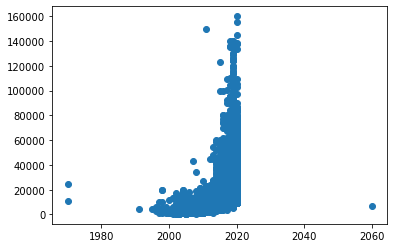

In [116]:

plt.scatter(df.sort_values(by="year").year, df.sort_values(by="year").price)



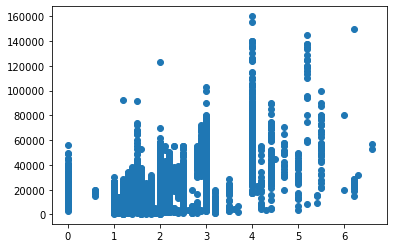

In [61]:
plt.scatter(df.sort_values(by="engineSize").engineSize, df.sort_values(by="engineSize").price)




#
# **Cleaning**
#This is where I was a bit challenged. This is what I have done:
- Add a new Column "age" (done)
- Drop column "mpg, Tax, Tax" (done)
- Drop a few rows with outliers 
1. Year = <2015 & >2020  (done)
2. Fuel type = remove electric and other (done)



In [22]:
##we want to create a new column that provides age of the care (IE number of years old)
df["current_year"]=2022

In [23]:
##creates a new field 
df["age"]=df["current_year"]-df["year"]
##df=df.drop(["Current_Year","year"],axis=1)
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make,tax(£),current_year,age
0,5 Series,2014,11200,Automatic,67068,Diesel,125.0,57.6,2.0,bmw,NaN,2022,8
1,6 Series,2018,27000,Automatic,14827,Petrol,145.0,42.8,2.0,bmw,NaN,2022,4
2,5 Series,2016,16000,Automatic,62794,Diesel,160.0,51.4,3.0,bmw,NaN,2022,6
3,1 Series,2017,12750,Automatic,26676,Diesel,145.0,72.4,1.5,bmw,NaN,2022,5
4,7 Series,2014,14500,Automatic,39554,Diesel,160.0,50.4,3.0,bmw,NaN,2022,8


In [24]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,tax(£),current_year,age
count,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,4860.000000,108540.0,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.256183,55.166825,1.661644,121.147119,2022.0,4.901972
std,2.130057,9756.266820,21176.423684,63.404805,16.138522,0.557058,58.003289,0.0,2.130057
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,0.000000,2022.0,-38.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000,125.000000,2022.0,3.000000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000,145.000000,2022.0,5.000000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000,145.000000,2022.0,6.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000,2022.0,52.000000


In [25]:
df.isnull().sum
#tax column has nulls plan to remove anyway

<bound method NDFrame._add_numeric_operations.<locals>.sum of         model   year  price  transmission  mileage  fuelType    tax    mpg  \
0       False  False  False         False    False     False  False  False   
1       False  False  False         False    False     False  False  False   
2       False  False  False         False    False     False  False  False   
3       False  False  False         False    False     False  False  False   
4       False  False  False         False    False     False  False  False   
...       ...    ...    ...           ...      ...       ...    ...    ...   
108535  False  False  False         False    False     False   True   True   
108536  False  False  False         False    False     False   True   True   
108537  False  False  False         False    False     False   True   True   
108538  False  False  False         False    False     False   True   True   
108539  False  False  False         False    False     False   True   True   

 

In [54]:
##will only populate 2015 - 2020 Outliers removed
df=df[(df.year >= 2015) & (df.year <=2020)]

 


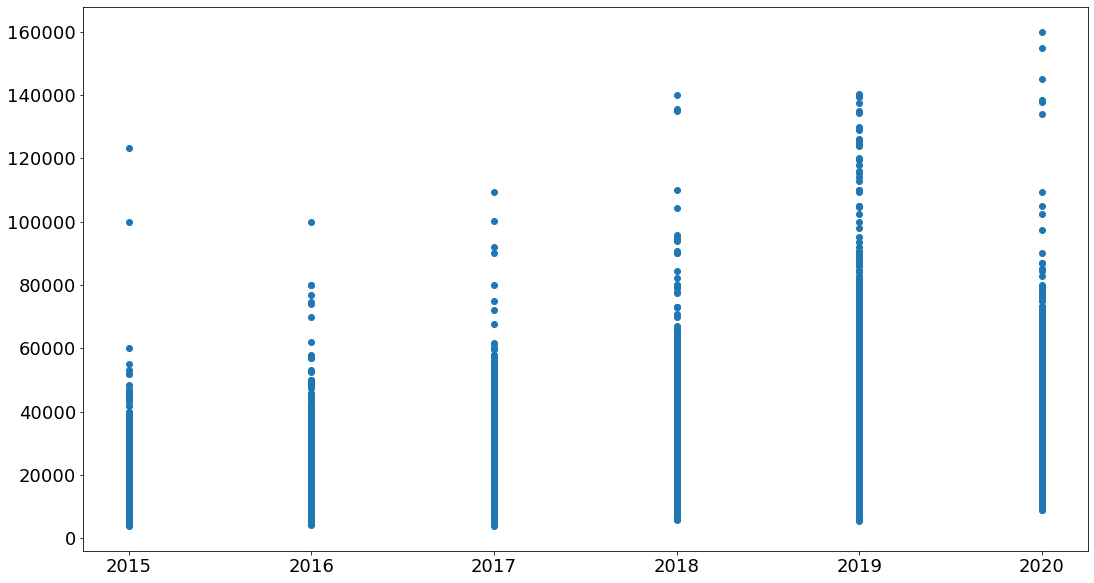

In [55]:
plt.scatter(df.sort_values(by="year").year, df.sort_values(by="year").price)

In [105]:
##removing the "Other and Electric values form the database"
df = df[df["fuelType"].str.contains("Electric|Other") == False]

print(df)

          model  year  price transmission  mileage fuelType  tax(£)   mpg  \
0           I20  2017   7999       Manual    17307   Petrol   145.0  58.9   
1        Tucson  2016  14499    Automatic    25233   Diesel   235.0  43.5   
2        Tucson  2016  11399       Manual    37877   Diesel    30.0  61.7   
3           I10  2016   6499       Manual    23789   Petrol    20.0  60.1   
4          IX35  2015  10199       Manual    33177   Diesel   160.0  51.4   
...         ...   ...    ...          ...      ...      ...     ...   ...   
108535   Fiesta  2016   7999       Manual    31348   Petrol     NaN  54.3   
108536    B-MAX  2017   8999       Manual    16700   Petrol     NaN  47.1   
108537    B-MAX  2014   7499       Manual    40700   Petrol     NaN  57.7   
108538    Focus  2015   9999       Manual     7010   Diesel     NaN  67.3   
108539       KA  2018   8299       Manual     5007   Petrol     NaN  57.7   

        engineSize    make    tax  
0              1.2  hyundi    NaN  
1  

<AxesSubplot:xlabel='fuelType', ylabel='count'>

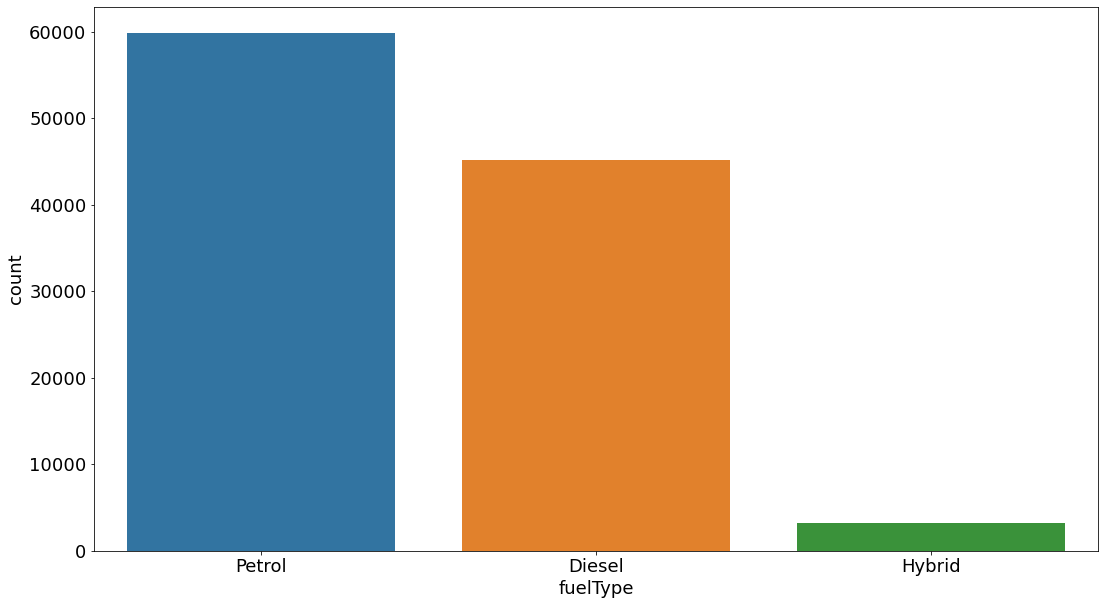

In [99]:
##Confirms the Electric and Other has been removed
sns.countplot(df["fuelType"])

In [106]:
##mielage between 0 and 175000 will be included
df=df[(df.mileage >= 0) & (df.mileage <=175000)]

<AxesSubplot:xlabel='mileage', ylabel='price'>

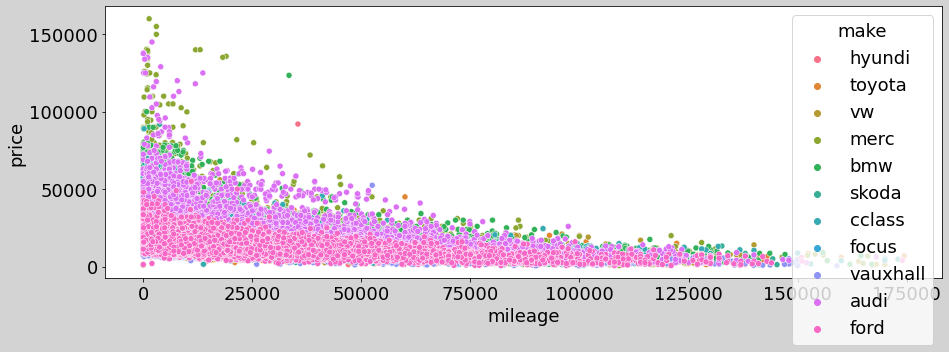

In [107]:
##this confirms the process was done
plt.figure(figsize = (15, 5), facecolor = "lightgray")
sns.scatterplot(df["mileage"], df["price"], hue = df["make"])

In [10]:
#drop null values 
df = df.dropna()

In [41]:
df.drop(['tax','tax(£)','mpg'],axis=1) 

#removing the tax tax(£) and mpg columns

,model,year,price,transmission,mileage,fuelType,engineSize,make
0,GT86,2016,16000,Manual,24089,Petrol,2.0,toyota
1,GT86,2017,15995,Manual,18615,Petrol,2.0,toyota
2,GT86,2015,13998,Manual,27469,Petrol,2.0,toyota
3,GT86,2017,18998,Manual,14736,Petrol,2.0,toyota
4,GT86,2017,17498,Manual,36284,Petrol,2.0,toyota
...,...,...,...,...,...,...,...,...
108535,C Class,2020,35999,Automatic,500,Diesel,2.0,merc
108536,B Class,2020,24699,Automatic,2500,Diesel,2.0,merc
108537,GLC Class,2019,30999,Automatic,11612,Diesel,2.1,merc
108538,CLS Class,2019,37990,Automatic,2426,Diesel,2.0,merc


#
# **Standardize the Data** 

In [1]:
#standardize the data using standard scaler 

df = pd.DataFrame(df)
  
# define standard scaler
scaler = StandardScaler()
  
# transform data
df = scaler.fit_transform(df)

NameError: name 'pd' is not defined

In [16]:
#DecisionTreeRegressor model (WHY ISN'T AGE WORKING???)
predict = "price"
df = df[[ "year", 
             "mileage",  "engineSize", 
              "price"]]
x = np.array(df.drop([predict], 1))
y = np.array(df[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0

In [20]:

X = df(["mileage", "year", "engineSize"])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = df(X, df(['price']))
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)
1.0
>>> reg.coef_
array([1., 2.])
>>> reg.intercept_
3.0
>>> reg.predict(np.array([[3, 5]]))
array([16]
X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2540337229.py, line 12)

In [0]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [2]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'mielage', 'engineSize']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

NameError: name 'DataForML_Numeric' is not defined

In [0]:
df = pd.df('music.csv')
X = music_data.drop(columns = ['genre'])
y = music_data['genre']
model = DecisionTreeClassifier()
model.fit(X, y)

tree.export_graphviz(model, out_file = 'music-recommender.dot',
    feature_names = ['age', 'gender'],
    class_names = sorted(y.unique()),
    label = 'all',
    rounded = True,
    filled = True)


In [0]:

# Define and fit the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Predict two values
predictions = model.predict([[21,1], [22, 0]])
predictions